In [12]:
import pandas as pd

# Загрузка данных
file_path = 'testdata.xlsx'
data = pd.read_excel(file_path)

print(data)

/Users/taniyashuba/DataspellProjects/ADlabs/venv/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


     REQUEST_ID  FROM_UNIXTIME(mi.EVENTTIME)            Т решения  STATUS  \
0     M00311663                 45170.441667  2023-09-01 11:03:46       9   
1     M00311809                 45170.461111  2023-09-01 12:54:17       9   
2     M00311495                 45170.270833  2023-09-01 12:50:32       9   
3     M00311668                 45170.451389  2023-09-01 14:00:27       9   
4     M00311823                 45170.578472  2023-09-01 14:24:32       9   
...         ...                          ...                  ...     ...   
3985  M00317540                 45209.550694  2023-10-10 15:16:33       6   
3986  M00316727                 45204.668750  2023-10-05 17:09:01       6   
3987  M00316632                 45204.551389  2023-10-05 15:18:52       6   
3988  M00312088                 45173.479861  2023-09-04 14:08:18       6   
3989  M00323740                 45255.181944                  NaN       3   

                   STATUS MI  PRIORITY  \
0                     Закрыт     

In [13]:
print(data)

     REQUEST_ID  FROM_UNIXTIME(mi.EVENTTIME)            Т решения  STATUS  \
0     M00311663                 45170.441667  2023-09-01 11:03:46       9   
1     M00311809                 45170.461111  2023-09-01 12:54:17       9   
2     M00311495                 45170.270833  2023-09-01 12:50:32       9   
3     M00311668                 45170.451389  2023-09-01 14:00:27       9   
4     M00311823                 45170.578472  2023-09-01 14:24:32       9   
...         ...                          ...                  ...     ...   
3985  M00317540                 45209.550694  2023-10-10 15:16:33       6   
3986  M00316727                 45204.668750  2023-10-05 17:09:01       6   
3987  M00316632                 45204.551389  2023-10-05 15:18:52       6   
3988  M00312088                 45173.479861  2023-09-04 14:08:18       6   
3989  M00323740                 45255.181944                  NaN       3   

                   STATUS MI  PRIORITY  \
0                     Закрыт     

In [14]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Инициализация геокодера с использованием Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

# Функция для обратного геокодирования
def reverse_geocode(address):
    try:
        # RateLimiter обрабатывает задержку между запросами
        geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
        location = geocode(address)
        return (location.latitude, location.longitude)
    except:
        # В случае ошибки возвращаем None
        return None

# Список адресов
addresses = [
    "Москва, проспект Кутузовский, д.26 к.3",
    "город Балашиха, улица Комсомольская, д.8"
]

# Проходимся по списку адресов и получаем их координаты
coordinates = [reverse_geocode(address) for address in addresses]

# Выводим результаты
for address, coord in zip(addresses, coordinates):
    print(f"Адрес: {address}, Координаты: {coord}")

Адрес: Москва, проспект Кутузовский, д.26 к.3, Координаты: None
Адрес: город Балашиха, улица Комсомольская, д.8, Координаты: None


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Убедимся, что столбец "Т решения" в формате datetime
data['Т решения'] = pd.to_datetime(data['Т решения'])

# Создаем столбец с числовым представлением дат
# Вычитаем минимальную дату из всех дат и преобразуем результат в количество дней
data['NumericDate'] = (data['Т решения'] - data['Т решения'].min()).dt.days

# Группируем данные по дате и считаем количество поломок для каждой даты
grouped_data = data.groupby('NumericDate').size()

# Подготовка данных
X = grouped_data.index.values.reshape(-1, 1)  # Изменяем форму, чтобы X был 2D массивом
y = grouped_data.values

# Разделение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Обучение модели случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = rf.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 129.6842380952381
R^2 Score: 0.473362287745405


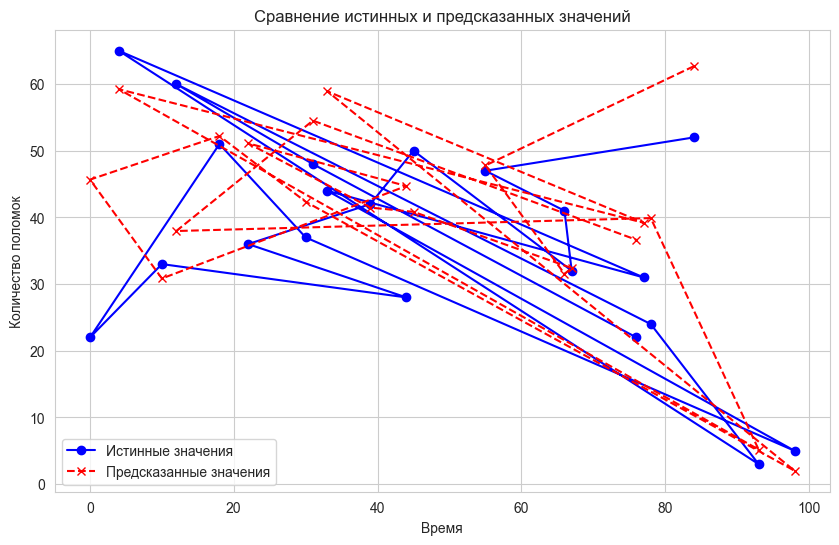

In [21]:
import matplotlib.pyplot as plt

# Истинные значения
plt.figure(figsize=(10,6))
plt.plot(X_test, y_test, label='Истинные значения', color='blue', marker='o')

# Предсказанные значения
plt.plot(X_test, y_pred, label='Предсказанные значения', color='red', linestyle='--', marker='x')

plt.title('Сравнение истинных и предсказанных значений')
plt.xlabel('Время')
plt.ylabel('Количество поломок')
plt.legend()
plt.show()


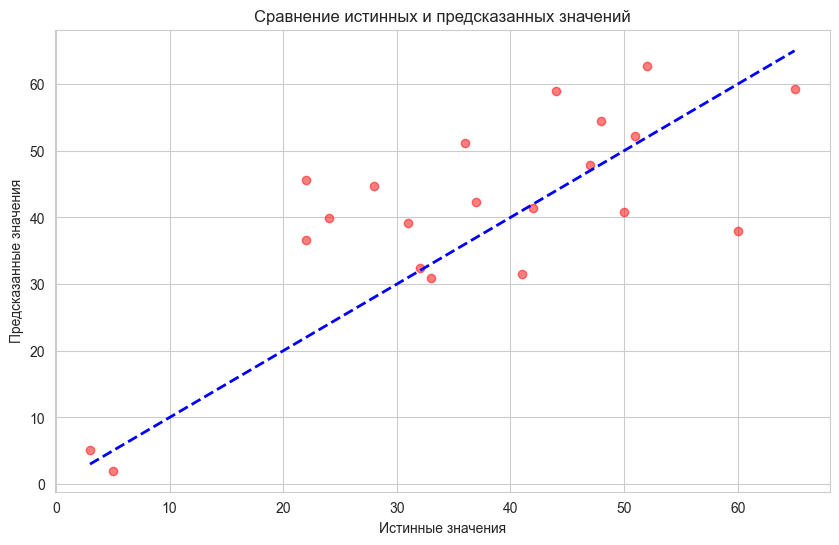

In [20]:
import matplotlib.pyplot as plt

# Создание диаграммы рассеяния
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red')

# Добавление диагонали, представляющей идеальное предсказание
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', li, linestyle='')

plt.title('Сравнение истинных и предсказанных значений')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Функция для конвертации Excel serial date в стандартное время
def convert_excel_serialdate_to_datetime(serial_date):
    excel_epoch = datetime(1899, 12, 30)
    converted_date = excel_epoch + timedelta(days=serial_date)
    return converted_date

# Загрузка данных из Excel файла
file_path = 'путь_к_вашему_файлу.xlsx'
data = pd.read_excel(file_path)

# Преобразование столбцов
data['FROM_UNIXTIME(mi.EVENTTIME)'] = data['FROM_UNIXTIME(mi.EVENTTIME)'].apply(convert_excel_serialdate_to_datetime)
data['Крайний срок'] = data['Крайний срок'].apply(convert_excel_serialdate_to_datetime)

# Проверка результатов
print(data[['FROM_UNIXTIME(mi.EVENTTIME)', 'Крайний срок']].head())
# Сохранение измененного DataFrame обратно в Excel-файл
data.to_excel(file_path, index=False)

# Проверка: повторно загрузим файл и отобразим первые несколько строк
updated_data = pd.read_excel(file_path)
print(updated_data.head())


In [2]:
import pandas as pd

# Загрузка данных
file_path = 'data.xlsx'
data = pd.read_excel(file_path)

print(data)

/Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


           № МИ     Т события STATUS MI  PRIORITY  \
0     M00311663  45170.441667    Закрыт         3   
1     M00311809  45170.461111    Закрыт         3   
2     M00311495  45170.270833    Закрыт         4   
3     M00311668  45170.451389    Закрыт         3   
4     M00311823  45170.578472    Закрыт         5   
...         ...           ...       ...       ...   
4466  M00318660  45218.938194    Закрыт         5   
4467  M00319090  45223.893750    Закрыт         0   
4468  M00318852  45220.636609    Закрыт         3   
4469  M00319771  45227.279861    Закрыт         4   
4470  M00320728  45233.570139    Закрыт         0   

                                        Adress  \
0       Москва, проспект Кутузовский, д.26 к.3   
1              Москва, Сумской проезд, д.4 к.4   
2                Москва, улица Удальцова, д.79   
3       Москва, Большой Казенный переулок, д.4   
4                 Москва, Рубцов переулок, д.4   
...                                        ...   
4466         

In [4]:
# Температура АКБ за пределами нормы
# BatteryOffline
# Требуется замена акб
# BatteryPowerOFF
# Отключены батареи
# Подозрение на кражу АКБ
# BatteryLoopOffline

In [8]:
print(data['Широта'].isnull().sum(), data['Долгота'].isnull().sum())


78 78


In [9]:
data['Широта'] = pd.to_numeric(data['Широта'], errors='coerce')
data['Долгота'] = pd.to_numeric(data['Долгота'], errors='coerce')


In [10]:
data = data.dropna(subset=['Широта', 'Долгота'])


In [1]:
import pandas as pd

# Загрузка данных из файла Excel
file_path = '2023new.xlsx'
data = pd.read_excel(file_path)

# Список описаний, которые нужно удалить
descriptions_to_remove = [
    'Самовосстановление'
    # "Температура АКБ за пределами нормы",
    # "BatteryOffline",
    # "Требуется замена акб",
    # "BatteryPowerOFF",
    # "Отключены батареи",
    # "Подозрение на кражу АКБ",
    # "BatteryLoopOffline"
]

# Удаление строк, содержащих данные описания
filtered_data = data[~data['Решение'].isin(descriptions_to_remove)]

# Сохранение отфильтрованных данных обратно в Excel
filtered_data.to_excel('2023new.xlsx', index=False)


In [13]:
import folium
import pandas as pd

# Загрузка данных
data = pd.read_excel('newdata.xlsx')

# Предварительная обработка данных
data['Широта'] = pd.to_numeric(data['Широта'], errors='coerce')
data['Долгота'] = pd.to_numeric(data['Долгота'], errors='coerce')
data = data.dropna(subset=['Широта', 'Долгота'])

# Создание карты
m = folium.Map(location=[55.7558, 37.6173], zoom_start=10) # Координаты центра Москвы

# Добавление маркеров
for index, row in data.iterrows():
    folium.Marker([row['Широта'], row['Долгота']], popup=row['Техописание']).add_to(m)

# Сохранение карты в HTML файл
m.save('map.html')


In [ ]:
from scipy.integrate import quad
from numpy import cosh, exp

# Задаем подынтегральную функцию
def integrand(x, n):
    return exp(-cosh(x - 1) / n)

# Предположим, что n — это заданный положительный параметр, например n=1
n = 1

# Вычисляем интеграл численно от 1 до 3
integral_value, integral_error = quad(integrand, 1, 3, args=(n,))

print(integral_value)
